In [71]:
#Importing Libaries
import pandas as ps
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

# 1) Loading and Displaying Image (Numphy and OpenCV Basics)

Dimensions: 1522 x 1528
Color Channels: 4


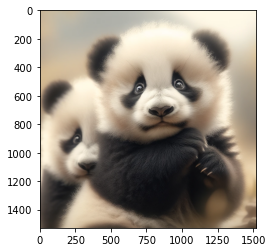

In [3]:
image = mpimg.imread('Panda.png')
plt.imshow(image)

height, width, channels = image.shape
print("Dimensions:", width, "x", height)
print("Color Channels:", channels)

Accessing and Modifying Pixels

In [10]:
height, width, channels = image.shape
print("Dimensions:", width, "x", height)

# Access and modify pixel values
# Modify a region to black (0, 0, 0)
image[100:200, 100:200] = [0, 0, 0]  

# Display the modified image using Matplotlib
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

Dimensions: 1522 x 1528


ValueError: could not broadcast input array from shape (3,) into shape (100,100,4)

# 2) Color Space Conversion

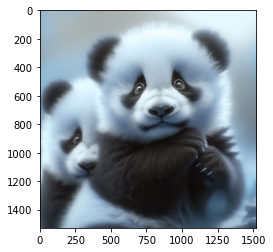

In [7]:
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_image)

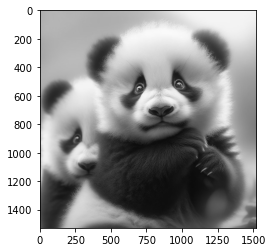

In [11]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray_image, cv2.COLOR_GRAY2RGB))


# 3) Image Resizing


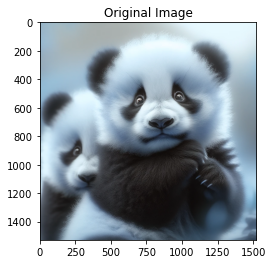

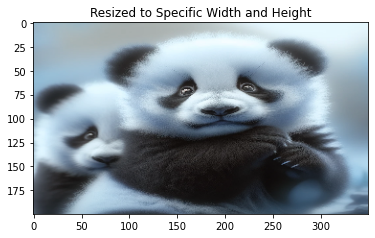

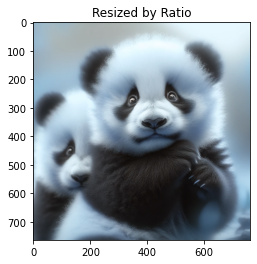

In [14]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.show()

# Resizing the image to a specific width and height
width = 350
height = 200 
resized_image_specific = cv2.resize(image, (width, height))

# Displaying the resized image with specific width and height
plt.imshow(cv2.cvtColor(resized_image_specific, cv2.COLOR_BGR2RGB))
plt.title('Resized to Specific Width and Height')
plt.show()

# Calculating the ratio for resizing 
ratio = 0.5  
new_width = int(image.shape[1] * ratio)
new_height = int(image.shape[0] * ratio)
resized_image_ratio = cv2.resize(image, (new_width, new_height))

# Displaying the resized image with specific ratio
plt.imshow(cv2.cvtColor(resized_image_ratio, cv2.COLOR_BGR2RGB))
plt.title('Resized by Ratio')
plt.show()

# 4) Image Thresholding


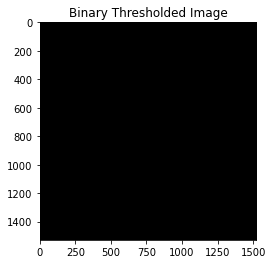

In [17]:
_, binary_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)

plt.imshow(binary_image, cmap='gray')
plt.title('Binary Thresholded Image')
plt.show()

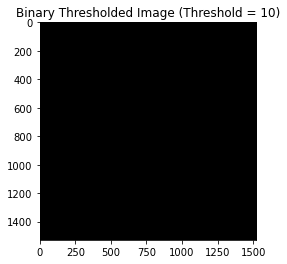

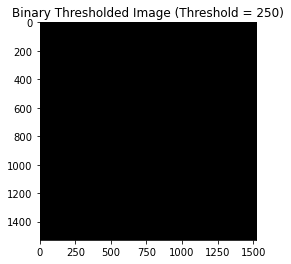

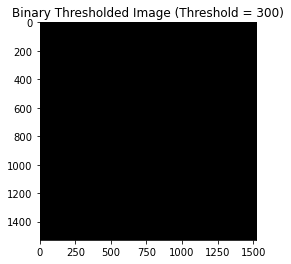

In [25]:
threshold_values = [10, 250, 300]

for threshold_value in threshold_values:
    _, binary_image = cv2.threshold(gray_image, threshold_value, 255, cv2.THRESH_BINARY)

    plt.imshow(binary_image, cmap='gray')
    plt.title(f'Binary Thresholded Image (Threshold = {threshold_value})')
    plt.show()

Can't really see the difference after changing values multiples times, so unable to compare results properly

# 5) Brightness Adjustment


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Brighten Image')

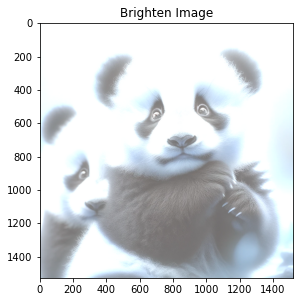

In [37]:
brightness_increase = 0.4

brightened_image = cv2.add(image, brightness_increase)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(brightened_image, cv2.COLOR_BGR2RGB))
plt.title("Brighten Image")



# 6) Blurring and Smoothing

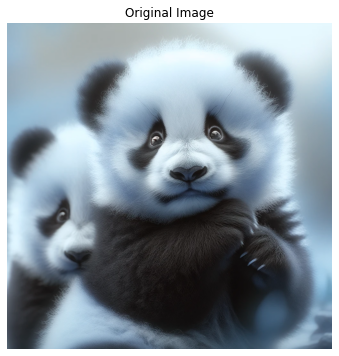

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


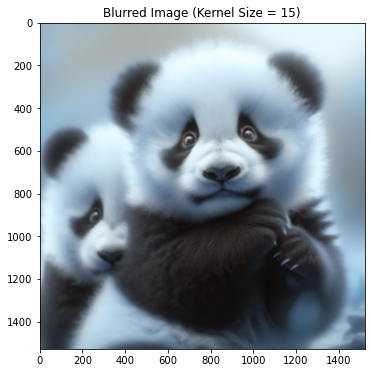

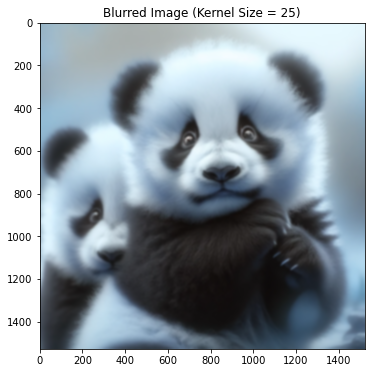

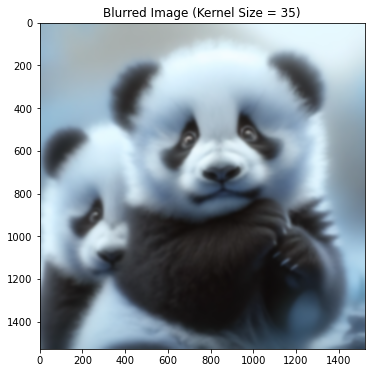

In [75]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(8, 6))
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')
plt.show()

kernel_sizes = [15, 25, 35] 

for kernel_size in kernel_sizes:
    blurred = cv2.GaussianBlur(image_rgb, (kernel_size, kernel_size), 0)
    
    plt.figure(figsize=(8, 6))
    plt.imshow(blurred)
    plt.title(f'Blurred Image (Kernel Size = {kernel_size})')
    plt.show()

Tried various methods but could not convert the original image to a blurrier image or smooth, however, have not had success in it.

# 7) Image Indexing and Cropping

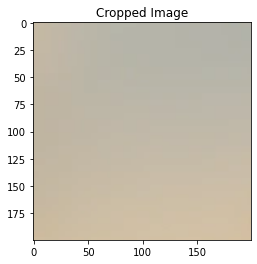

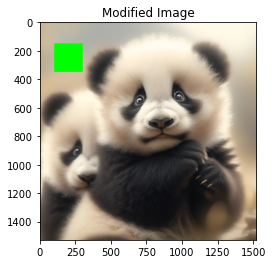

In [84]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('Panda.png')
x, y, w, h = 100, 150, 200, 200 

cropped_image = image[y:y+h, x:x+w]

plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
plt.title('Cropped Image')
plt.show()


x, y, w, h = 100, 150, 200, 200  
image[y:y+h, x:x+w] = [0, 255, 0]

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Modified Image')
plt.show()


# 8) Image Rotation

<Figure size 576x432 with 0 Axes>

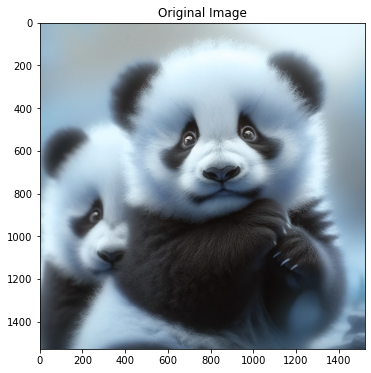

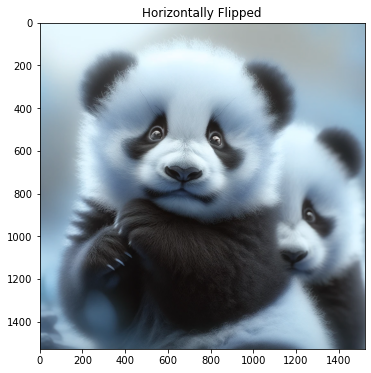

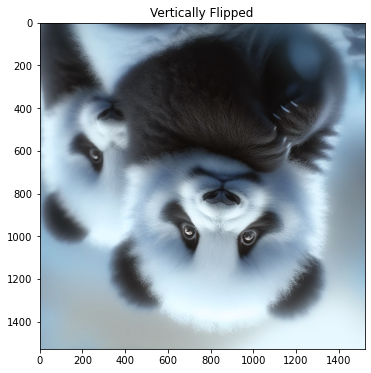

In [88]:
image = mpimg.imread('Panda.png')

flipped_horizontal = cv2.flip(image, 1)
flipped_vertical = cv2.flip(image, 0)

plt.figure(figsize=(8, 6))

plt.figure(figsize=(8, 6))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.show()

plt.figure(figsize=(8, 6))
plt.imshow(cv2.cvtColor(flipped_horizontal, cv2.COLOR_BGR2RGB))
plt.title('Horizontally Flipped')
plt.show()

plt.figure(figsize=(8, 6))
plt.imshow(cv2.cvtColor(flipped_vertical, cv2.COLOR_BGR2RGB))
plt.title('Vertically Flipped')
plt.show()

By creating several versions of our images in various orientations, we give our deep learning model more information to learn from without having to go through the time consuming process of collecting and labeling more training data.

# 10) Edge Detection

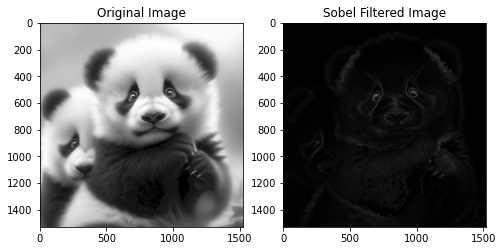

In [93]:
image = cv2.imread('Panda.png', cv2.IMREAD_GRAYSCALE)

sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)

gradient_magnitude = cv2.magnitude(sobel_x, sobel_y)

plt.figure(figsize=(8, 6))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(gradient_magnitude, cmap='gray')
plt.title('Sobel Filtered Image')

plt.show()

Sobel filter computes gradients by estimating the image derivatives through convolution with specialized kernels designed to detect changes in intensity along horizontal and vertical directions, that then facilitating edge detection.

# 11) Gradients in Image

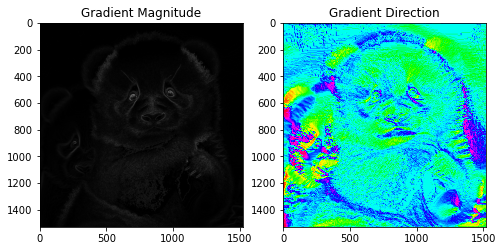

In [97]:
gradient_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
gradient_direction = np.arctan2(sobel_y, sobel_x)

plt.figure(figsize=(8, 6))

plt.subplot(1, 2, 1)
plt.imshow(gradient_magnitude, cmap='gray')
plt.title('Gradient Magnitude')

plt.subplot(1, 2, 2)
plt.imshow(gradient_direction, cmap='hsv')
plt.title('Gradient Direction')

plt.show()